# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)
print(f"GPU: {tf.config.experimental.list_physical_devices('GPU')}")
tf.test.is_built_with_cuda()

[]

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

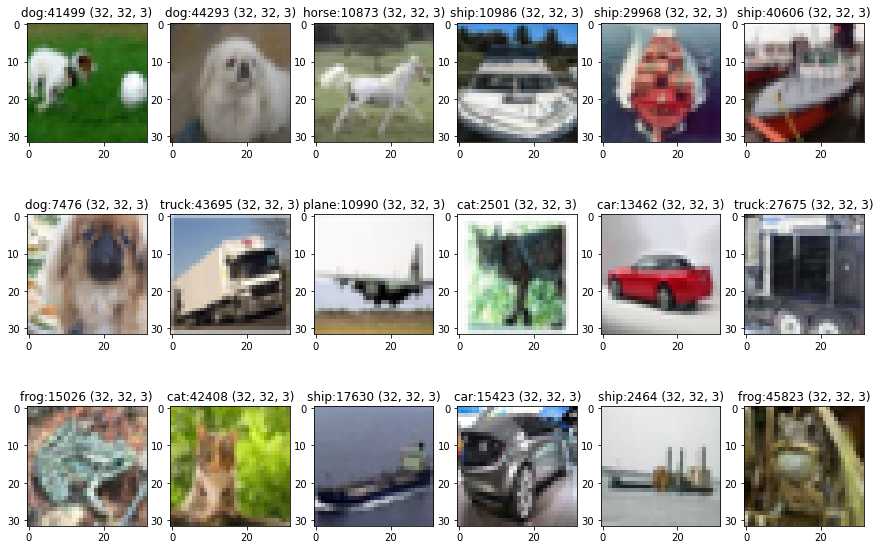

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(f'{classes[int(y_train[idx])]}:{idx} {x_train[idx,...].shape}')

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

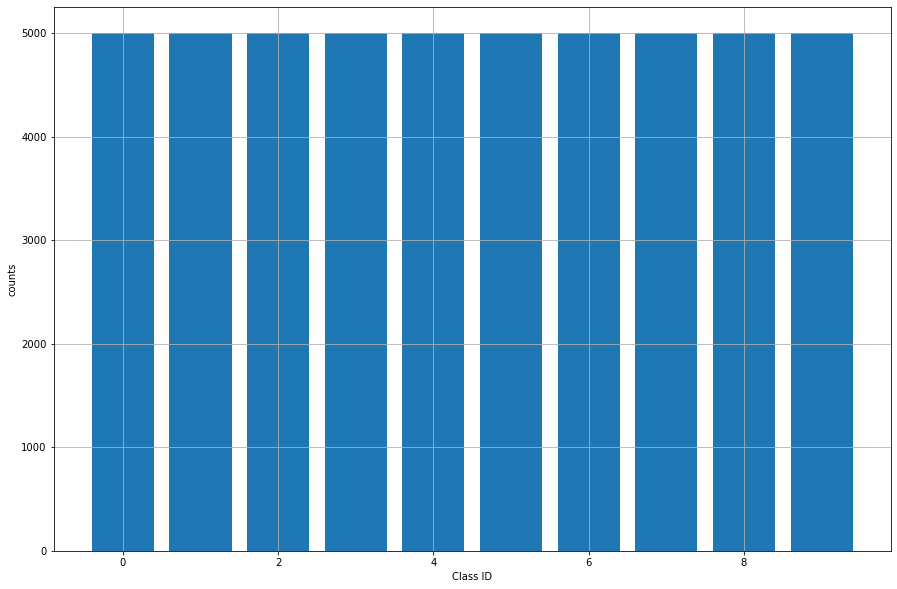

In [3]:
# Compute the class histogram
centers = np.arange(0, num_classes + 1)
counts, bounds = np.histogram(y_train, bins=centers-0.5)

plt.bar(centers[:-1], counts), plt.grid(True)
plt.xlabel('Class ID'), plt.ylabel('counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [4]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [5]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 10)               

### Step 3: Training

Compile the model and train it.

In [6]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time: ', time() - start)

Epoch 1/25
352/352 [==============================] - 7s 20ms/step - loss: 1.7593 - accuracy: 0.3752 - val_loss: 1.5733 - val_accuracy: 0.4482
Epoch 2/25
352/352 [==============================] - 7s 20ms/step - loss: 1.4413 - accuracy: 0.4937 - val_loss: 1.3619 - val_accuracy: 0.5176
Epoch 3/25
352/352 [==============================] - 7s 20ms/step - loss: 1.3409 - accuracy: 0.5321 - val_loss: 1.3016 - val_accuracy: 0.5506
Epoch 4/25
352/352 [==============================] - 7s 20ms/step - loss: 1.2740 - accuracy: 0.5511 - val_loss: 1.2374 - val_accuracy: 0.5736
Epoch 5/25
352/352 [==============================] - 7s 20ms/step - loss: 1.2279 - accuracy: 0.5732 - val_loss: 1.2132 - val_accuracy: 0.5770
Epoch 6/25
352/352 [==============================] - 7s 20ms/step - loss: 1.1847 - accuracy: 0.5874 - val_loss: 1.1541 - val_accuracy: 0.6062
Epoch 7/25
352/352 [==============================] - 7s 20ms/step - loss: 1.1534 - accuracy: 0.5976 - val_loss: 1.1495 - val_accuracy: 0.6008

Train Acc      0.695555567741394
Validation Acc 0.6679999828338623


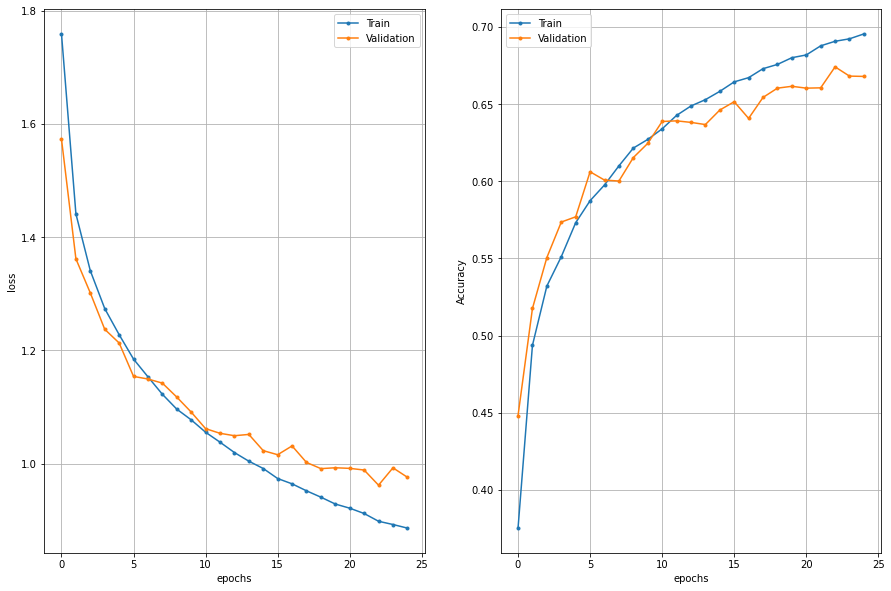

In [7]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [8]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_class_idx = np.argmax(y_pred, axis=1)

print('y_test', y_test[:10])
print('True', y_true[0:30])
print('Pred', y_pred_class_idx[0:5])
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

y_test [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
True [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6]
Pred [3 1 8 0 6]
Pred [[1.66503282e-03 1.12572059e-04 9.98242013e-03 9.10043418e-01
  2.81841122e-03 3.67791951e-02 2.32854635e-02 1.52024918e-03
  1.31922299e-02 6.00956380e-04]
 [1.28965691e-01 5.98159969e-01 5.32997597e-04 2.42119859e-06
  7.36879429e-06 4.79894986e-08 2.87057986e-07 5.29164299e-06
  2.56278783e-01 1.60471424e-02]
 [2.53340483e-01 2.35075742e-01 1.30120814e-02 2.08163611e-03
  1.07878158e-02 3.03646142e-04 2.69159151e-04 2.45382898e-02
  3.96659553e-01 6.39315769e-02]
 [7.20135212e-01 3.81733850e-02 4.53136535e-03 2.88860640e-04
  4.49730316e-03 1.77388720e-05 2.484964

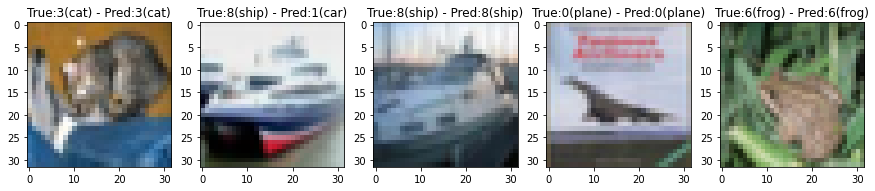

In [9]:
for ii in range(5):    
    plt.subplot(1,5,ii+1)
    # Show the image and the label
    plt.imshow(x_test[ii, ...])
    true_cn = classes[y_true[ii]]
    pred_cn = classes[y_pred_class_idx[ii]]
    plt.title(f'True:{y_true[ii]}({true_cn}) - Pred:{np.argmax(y_pred[ii])}({pred_cn})')

In [10]:
# Compute and print the accuracy for each class
acc_total = 0
for class_id, class_name in classes.items():
    
    class_mask = y_true == class_id
    prediction_mask = y_true == y_pred_class_idx
    mask = np.logical_and(class_mask, prediction_mask)
    
    num_true = np.sum(mask)
    num_total = np.sum(class_mask)
    acc = num_true/num_total
    acc_total += acc
    
    print(f'{class_name}: {num_true} ({acc})')
    
print(f'\nAverall accuracy: {acc_total / num_classes}')

plane: 715 (0.715)
car: 799 (0.799)
bird: 612 (0.612)
cat: 537 (0.537)
deer: 484 (0.484)
dog: 500 (0.5)
frog: 698 (0.698)
horse: 756 (0.756)
ship: 724 (0.724)
truck: 740 (0.74)

Averall accuracy: 0.6565000000000001


In [11]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.9964 - accuracy: 0.6565
Test loss   0.9963761568069458
Test metric 0.656499981880188


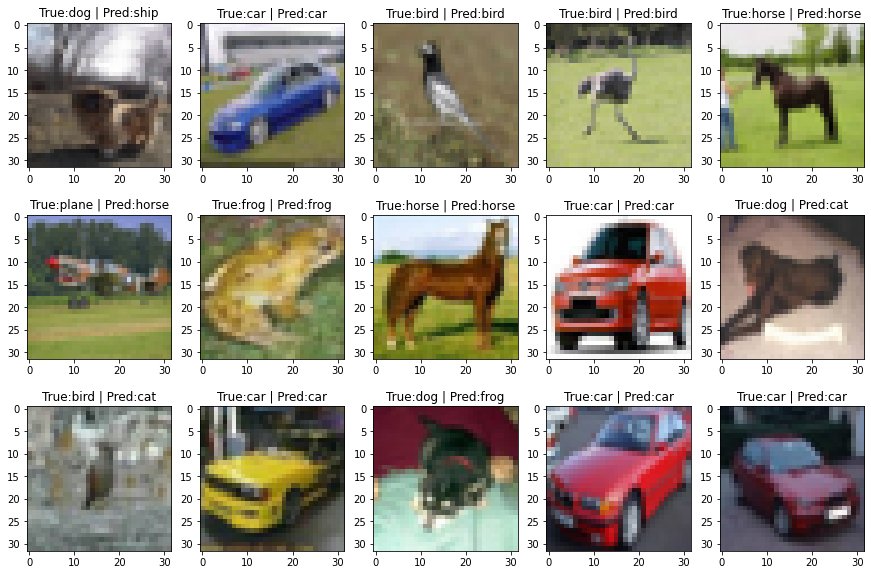

In [12]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    true_cn = classes[y_true[idx]]
    pred_cn = classes[y_pred_class_idx[idx]]
    plt.title(f'True:{true_cn} | Pred:{pred_cn}')

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

### Answers
* overall accuracy is around 66%
* See below, added all of them in this or that way: acc - from 66% to 80%
* A list of possible **ONE** modifications:
    * Added padding='same': improved  validation accuracy from 66% to 68%
    * Changed number of epochs from 25 to 50: acc - from 66% to 68%
    * Increased (doubled) number of neurons for all layers: acc - from 66% to 71%
    * Added extra layer Dense(128, activation='relu') before output: acc - from 66% to 69%
    * Increased batch size from 128 to 256: acc - from 66% to 66% (no changes)
    * Added extra layer Dropout(0.2)(net): acc - from 66% to 67%
    * Added extra layer BatchNormalization() after 1st Conv2D: acc from 66% to 69%
    * Added extra layer Conv2D(64, kernel_size=(3, 3), activation="relu") after 2nd MaxPooling: acc - from 66% to 70%

In [13]:
from keras.layers import Dropout, BatchNormalization
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dense(128, activation='relu', kernel_initializer='he_uniform')(net)
net = BatchNormalization()(net)
net = Dropout(0.5)(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [14]:
epochs = 50
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time: ', time() - start)

Epoch 1/50
352/352 [==============================] - 44s 126ms/step - loss: 1.5824 - accuracy: 0.4626 - val_loss: 2.1280 - val_accuracy: 0.2730
Epoch 2/50
352/352 [==============================] - 47s 134ms/step - loss: 1.1012 - accuracy: 0.6128 - val_loss: 1.1829 - val_accuracy: 0.5832
Epoch 3/50
352/352 [==============================] - 50s 143ms/step - loss: 0.9362 - accuracy: 0.6727 - val_loss: 0.8370 - val_accuracy: 0.7142
Epoch 4/50
352/352 [==============================] - 48s 137ms/step - loss: 0.8408 - accuracy: 0.7067 - val_loss: 0.7946 - val_accuracy: 0.7218
Epoch 5/50
352/352 [==============================] - 44s 126ms/step - loss: 0.7606 - accuracy: 0.7362 - val_loss: 0.8799 - val_accuracy: 0.6886
Epoch 6/50
352/352 [==============================] - 44s 125ms/step - loss: 0.7020 - accuracy: 0.7541 - val_loss: 0.8236 - val_accuracy: 0.7174
Epoch 7/50
352/352 [==============================] - 44s 124ms/step - loss: 0.6487 - accuracy: 0.7753 - val_loss: 0.7207 - val_ac

Train Acc      0.9413999915122986
Validation Acc 0.7979999780654907


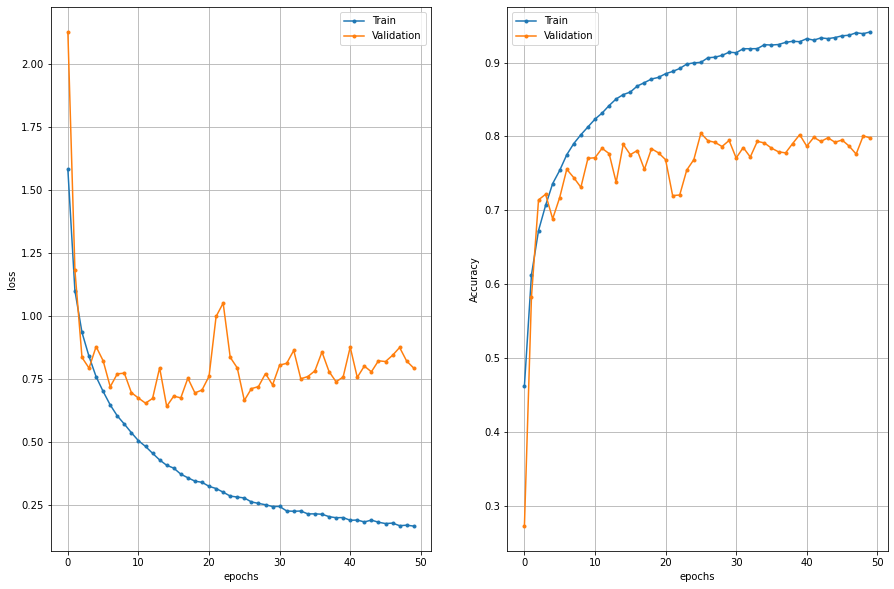

In [16]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    